Breast Cancer Detection

<h3>CNN</h3>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2,os
data_path='/content/drive/MyDrive/Dataset_BUSI_with_GT/'
categories=os.listdir(data_path)

labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'benign': 0, 'normal': 1, 'malignant': 2}
['benign', 'normal', 'malignant']
[0, 1, 2]


In [3]:
img_size=224
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

<h3>Recale and assign  catagorical labels</h3>

In [4]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)

from tensorflow.keras.utils import to_categorical
new_label = to_categorical(label)

# CNN Model

In [5]:
data.shape

(1578, 224, 224, 1)

In [6]:
data.shape[1:]

(224, 224, 1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

CNN_model=Sequential()

CNN_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)))
CNN_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))

CNN_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))

CNN_model.add(Flatten())
CNN_model.add(Dense(1024, activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(3, activation='softmax'))
CNN_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                   

<h3>Splitting data into traning and testing</h3>

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

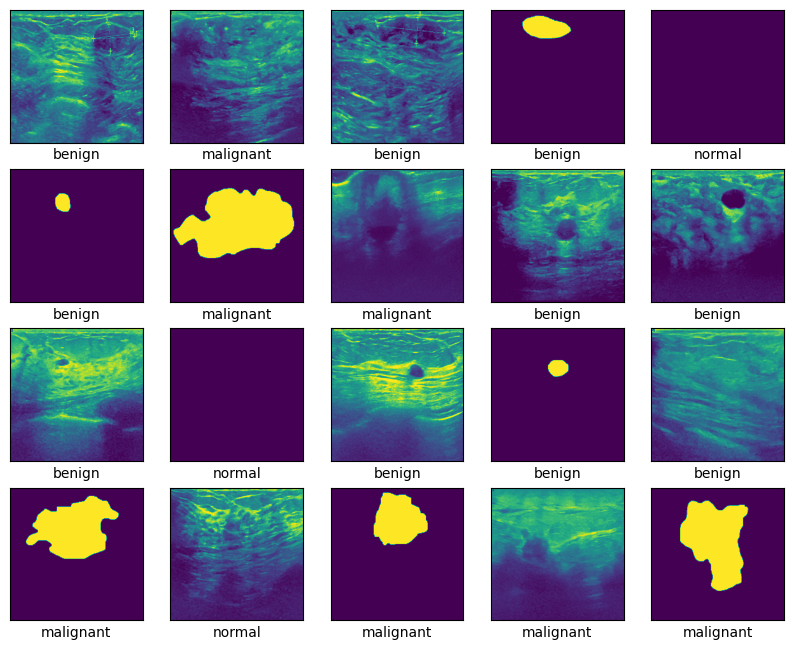

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [11]:
history=CNN_model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
36/36 [==============================] - 28s 317ms/step - loss: 0.5895 - accuracy: 0.5396 - val_loss: 0.5069 - val_accuracy: 0.6127
Epoch 2/10
36/36 [==============================] - 8s 231ms/step - loss: 0.4577 - accuracy: 0.6805 - val_loss: 0.4975 - val_accuracy: 0.6901
Epoch 3/10
36/36 [==============================] - 8s 232ms/step - loss: 0.3992 - accuracy: 0.7333 - val_loss: 0.5020 - val_accuracy: 0.6831
Epoch 4/10
36/36 [==============================] - 8s 232ms/step - loss: 0.3155 - accuracy: 0.7905 - val_loss: 0.5440 - val_accuracy: 0.6408
Epoch 5/10
36/36 [==============================] - 8s 224ms/step - loss: 0.2629 - accuracy: 0.8336 - val_loss: 0.5556 - val_accuracy: 0.7254
Epoch 6/10
36/36 [==============================] - 8s 236ms/step - loss: 0.2066 - accuracy: 0.8847 - val_loss: 0.6830 - val_accuracy: 0.7183
Epoch 7/10
36/36 [==============================] - 8s 230ms/step - loss: 0.1512 - accuracy: 0.9190 - val_loss: 0.6728 - val_accuracy: 0.7254
Epoch

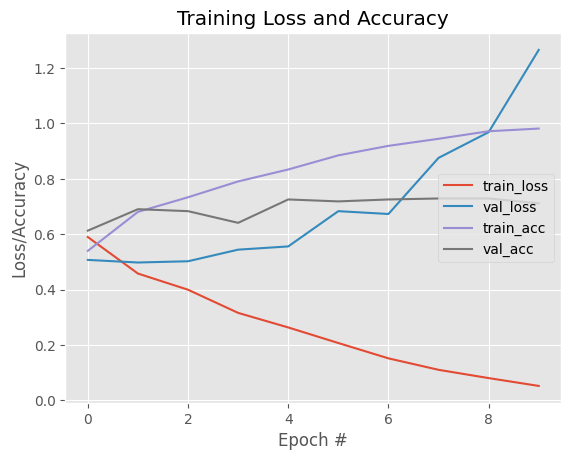

In [12]:
# # plot the training loss and accuracy
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

 U-NET





In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Loading and Preparation

Exploring data

In [14]:
# Common
import tensorflow as tf
from glob import glob
import numpy as np

# Data
from sklearn.model_selection import train_test_split
import cv2

# Data visualization
import matplotlib.pyplot as plt

# Model
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from keras.optimizers import Adam

# Metrics
from tensorflow.keras.metrics import *

In [15]:
paths = glob('/content/drive/MyDrive/Dataset_BUSI_with_GT/*/*')

print(f'\033[92m')
print(f"'normal' class has {len([i for i in paths if 'normal' in i and 'mask' not in i])} images and {len([i for i in paths if 'normal' in i and 'mask' in i])} masks.")
print(f"'benign' class has {len([i for i in paths if 'benign' in i and 'mask' not in i])} images and {len([i for i in paths if 'benign' in i and 'mask' in i])} masks.")
print(f"'malignant' class has {len([i for i in paths if 'malignant' in i and 'mask' not in i])} images and {len([i for i in paths if 'malignant' in i and 'mask' in i])} masks.")
print(f"\nThere are total of {len([i for i in paths if 'mask' not in i])} images and {len([i for i in paths if 'mask' in i])} masks.")


'normal' class has 133 images and 133 masks.
'benign' class has 437 images and 454 masks.
'malignant' class has 210 images and 211 masks.

There are total of 780 images and 798 masks.


In [16]:
sorted(glob('/content/drive/MyDrive/Dataset_BUSI_with_GT/benign/*'))[4:7]

['/content/drive/MyDrive/Dataset_BUSI_with_GT/benign/benign (100).png',
 '/content/drive/MyDrive/Dataset_BUSI_with_GT/benign/benign (100)_mask.png',
 '/content/drive/MyDrive/Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png']

<a id="3.2"></a>
## <span style="color:#08bf2c;"> Loading data </span>

Functions

In [17]:
def load_image(path, size):
    image = cv2.imread(path)
    image = cv2.resize(image, (size,size))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)   # shape: (size,size,3) -> (size,size,1)
    image = image/255.   # normalize
    return image

def load_data(root_path, size):
    images = []
    masks = []

    x = 0   # additional variable to identify images consisting of 2 or more masks

    for path in sorted(glob(root_path)):
        img = load_image(path, size)   # read mask or image

        if 'mask' in path:
            if x:   # this image has masks more than one
                masks[-1] += img   # add the mask to the last mask

                # When 2 masks are added, the range can increase by 0-2. So we will reduce it again to the range 0-1.
                masks[-1] = np.array(masks[-1]>0.5, dtype='float64')
            else:
                masks.append(img)
                x = 1   # if the image has a mask again, the above code will run next time
        else:
            images.append(img)
            x = 0   # for moving to the next image
    return np.array(images), np.array(masks)

In [18]:
size = 128   # image size: 128x128
X, y = load_data(root_path = '/content/drive/MyDrive/Dataset_BUSI_with_GT/*/*', size=size)

 <h3>EDA </h3>

<h3> Data of each class </h3>

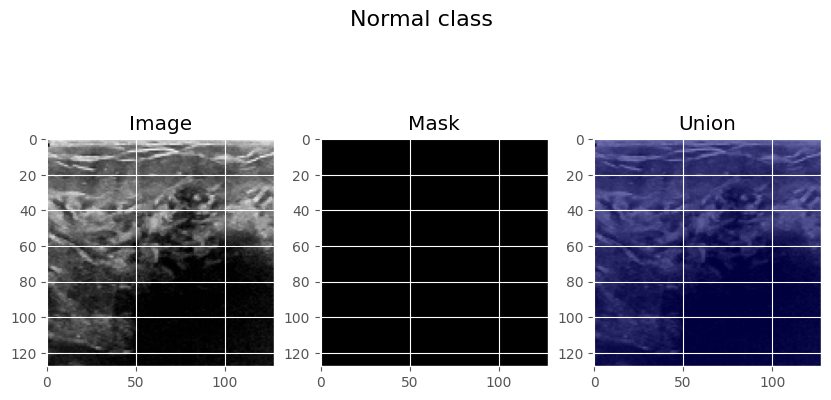

In [19]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

# X[0:437] benign
# X[437:647] malignant
# X[647:780] normal

i = np.random.randint(647,780)
ax[0].imshow(X[i], cmap='gray')
ax[0].set_title('Image')
ax[1].imshow(y[i], cmap='gray')
ax[1].set_title('Mask')
ax[2].imshow(X[i], cmap='gray')
ax[2].imshow(tf.squeeze(y[i]), alpha=0.5, cmap='jet')
ax[2].set_title('Union')
fig.suptitle('Normal class', fontsize=16)
plt.show()

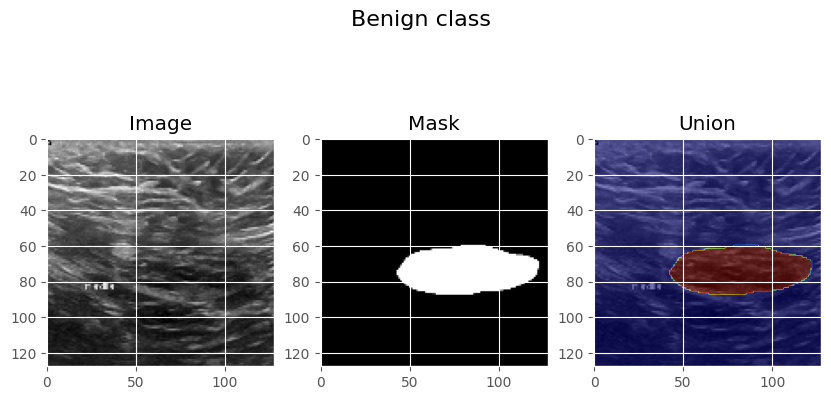

In [20]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

i = np.random.randint(437)
ax[0].imshow(X[i], cmap='gray')
ax[0].set_title('Image')
ax[1].imshow(y[i], cmap='gray')
ax[1].set_title('Mask')
ax[2].imshow(X[i], cmap='gray')
ax[2].imshow(tf.squeeze(y[i]), alpha=0.5, cmap='jet')
ax[2].set_title('Union')
fig.suptitle('Benign class', fontsize=16)
plt.show()

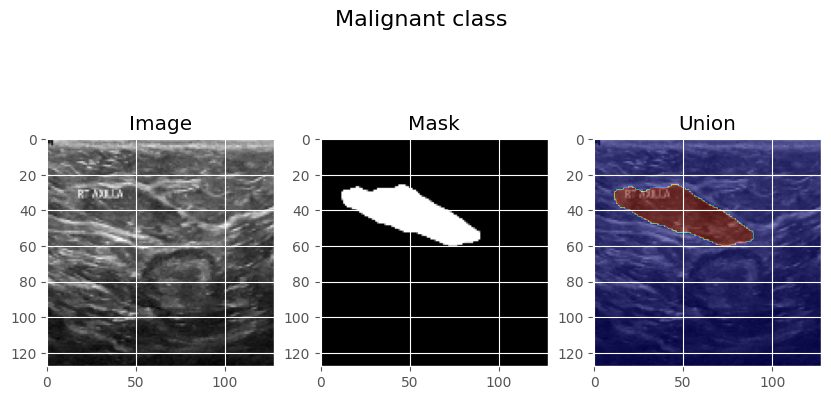

In [21]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

i = np.random.randint(437,647)
ax[0].imshow(X[i], cmap='gray')
ax[0].set_title('Image')
ax[1].imshow(y[i], cmap='gray')
ax[1].set_title('Mask')
ax[2].imshow(X[i], cmap='gray')
ax[2].imshow(tf.squeeze(y[i]), alpha=0.5, cmap='jet')
ax[2].set_title('Union')
fig.suptitle('Malignant class', fontsize=16)
plt.show()

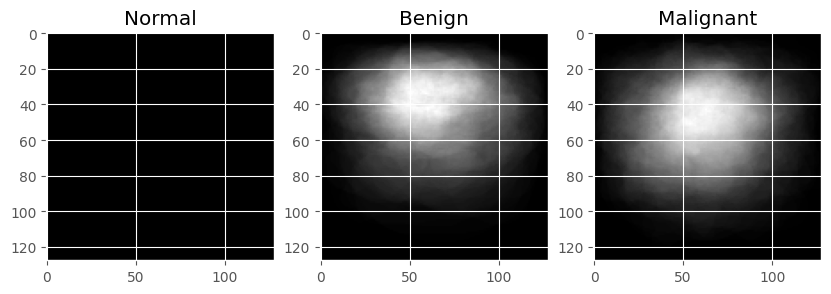

In [22]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

ax[0].imshow(sum(y[647:]), cmap='gray')
ax[0].set_title('Normal')
ax[1].imshow(sum(y[:437]), cmap='gray')
ax[1].set_title('Benign')
ax[2].imshow(sum(y[437:647]), cmap='gray')
ax[2].set_title('Malignant')
plt.show()

<h3> Data Pre-Processing</h3>

In [23]:
# drop normal class because normal class has not mask
X = X[:647]
y = y[:647]

print(f"X shape: {X.shape}     |  y shape: {y.shape}")

# prepare data to modeling
X = np.expand_dims(X, -1)
y = np.expand_dims(y, -1)

print(f"\nX shape: {X.shape}  |  y shape: {y.shape}")

X shape: (647, 128, 128)     |  y shape: (647, 128, 128)

X shape: (647, 128, 128, 1)  |  y shape: (647, 128, 128, 1)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(f'\033[92m')
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)


X_train shape: (582, 128, 128, 1)
y_train shape: (582, 128, 128, 1)
X_test shape: (65, 128, 128, 1)
y_test shape: (65, 128, 128, 1)


<h3> Building U-Net Architecture </h3>

In [25]:
def conv_block(input, num_filters):
    conv = Conv2D(num_filters, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(input)
    conv = Conv2D(num_filters, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
    return conv

In [26]:
def encoder_block(input, num_filters):
    conv = conv_block(input, num_filters)
    pool = MaxPooling2D((2, 2))(conv)
    return conv, pool

In [27]:
def decoder_block(input, skip_features, num_filters):
    uconv = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    con = concatenate([uconv, skip_features])
    conv = conv_block(con, num_filters)
    return conv

In [28]:
def build_model(input_shape):
    input_layer = Input(input_shape)

    s1, p1 = encoder_block(input_layer, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    output_layer = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(input_layer, output_layer, name="U-Net")
    return model

model = build_model(input_shape=(size, size, 1))
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

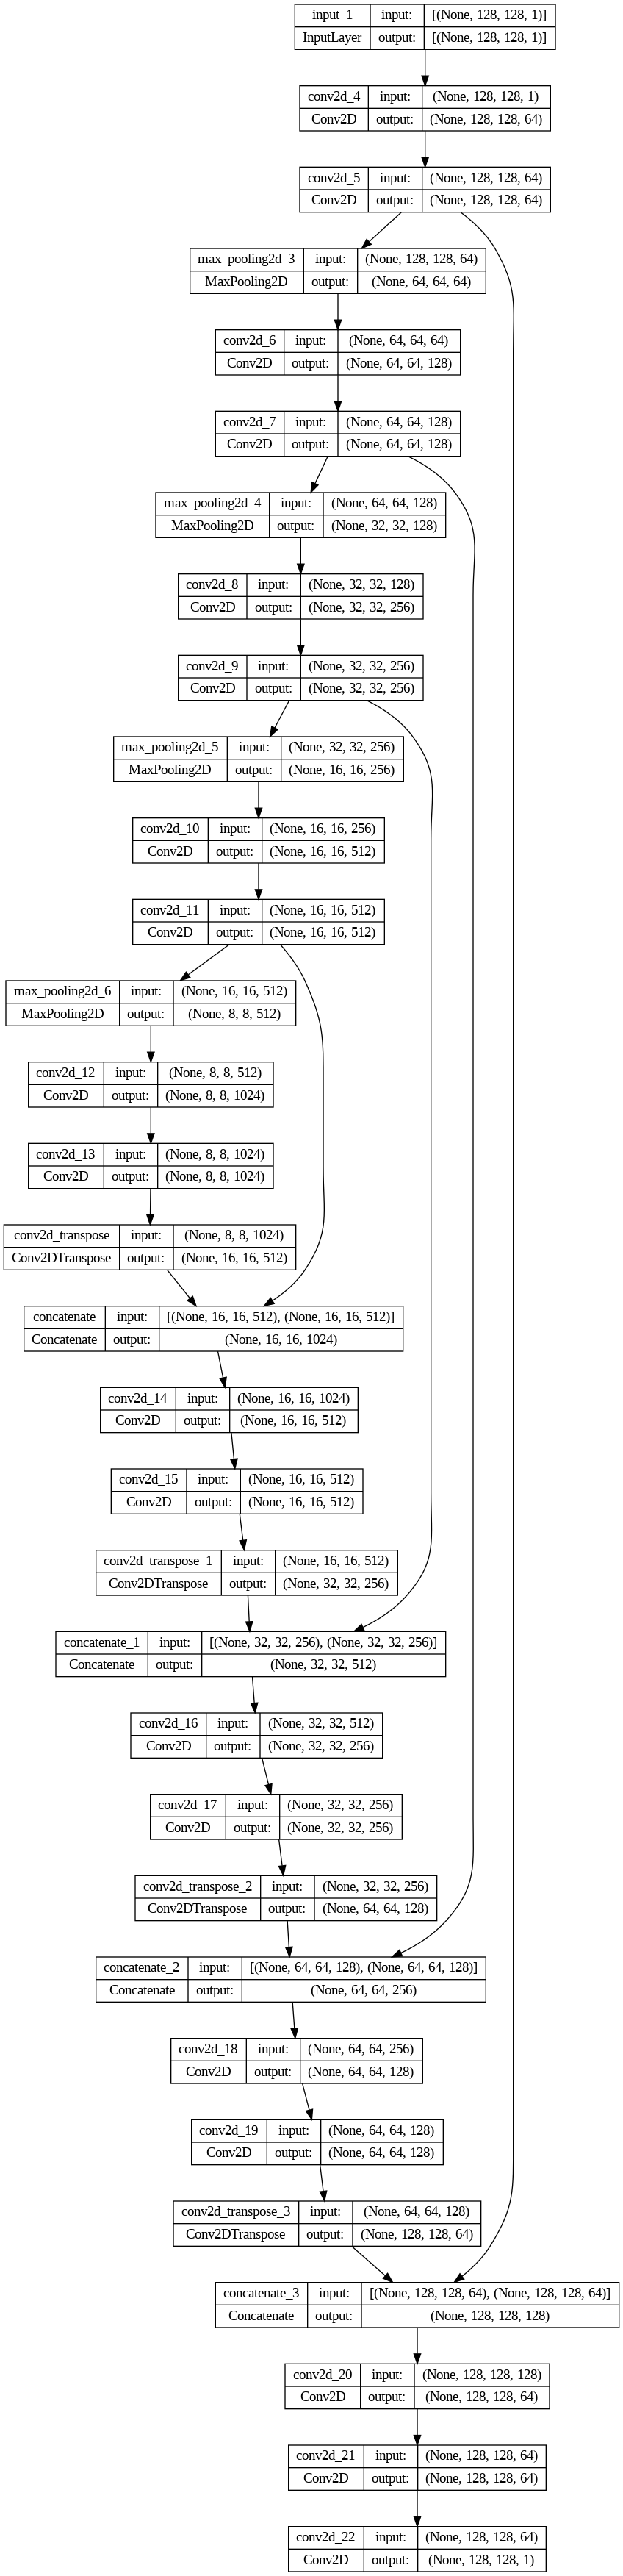

In [29]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [30]:
model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 128, 128, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_5 (Conv2D)           (None, 128, 128, 64)         36928     ['conv2d_4[0][0]']            
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 64)           0         ['conv2d_5[0][0]']            
 g2D)                                                                                         

In [31]:
history = model.fit(X_train, y_train, epochs =10 , validation_data = (X_test,y_test))

Epoch 1/10
19/19 [==============================] - 34s 725ms/step - loss: 0.3776 - accuracy: 0.8817 - val_loss: 0.3256 - val_accuracy: 0.9095
Epoch 2/10
19/19 [==============================] - 7s 387ms/step - loss: 0.3284 - accuracy: 0.9012 - val_loss: 0.2965 - val_accuracy: 0.9095
Epoch 3/10
19/19 [==============================] - 7s 378ms/step - loss: 0.3119 - accuracy: 0.9038 - val_loss: 0.2617 - val_accuracy: 0.9095
Epoch 4/10
19/19 [==============================] - 7s 371ms/step - loss: 0.2834 - accuracy: 0.9038 - val_loss: 0.2835 - val_accuracy: 0.9109
Epoch 5/10
19/19 [==============================] - 7s 365ms/step - loss: 0.2594 - accuracy: 0.9038 - val_loss: 0.5232 - val_accuracy: 0.6733
Epoch 6/10
19/19 [==============================] - 7s 357ms/step - loss: 0.2766 - accuracy: 0.8911 - val_loss: 0.2249 - val_accuracy: 0.9095
Epoch 7/10
19/19 [==============================] - 7s 354ms/step - loss: 0.2321 - accuracy: 0.9038 - val_loss: 0.2176 - val_accuracy: 0.9095
Epoch

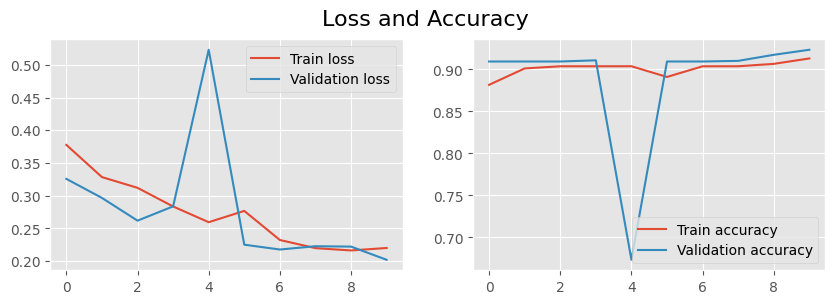

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[0].legend()
ax[1].plot(history.epoch, history.history["accuracy"], label="Train accuracy")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation accuracy")
ax[1].legend()
fig.suptitle('Loss and Accuracy', fontsize=16)
plt.show()

 **Evaluation**

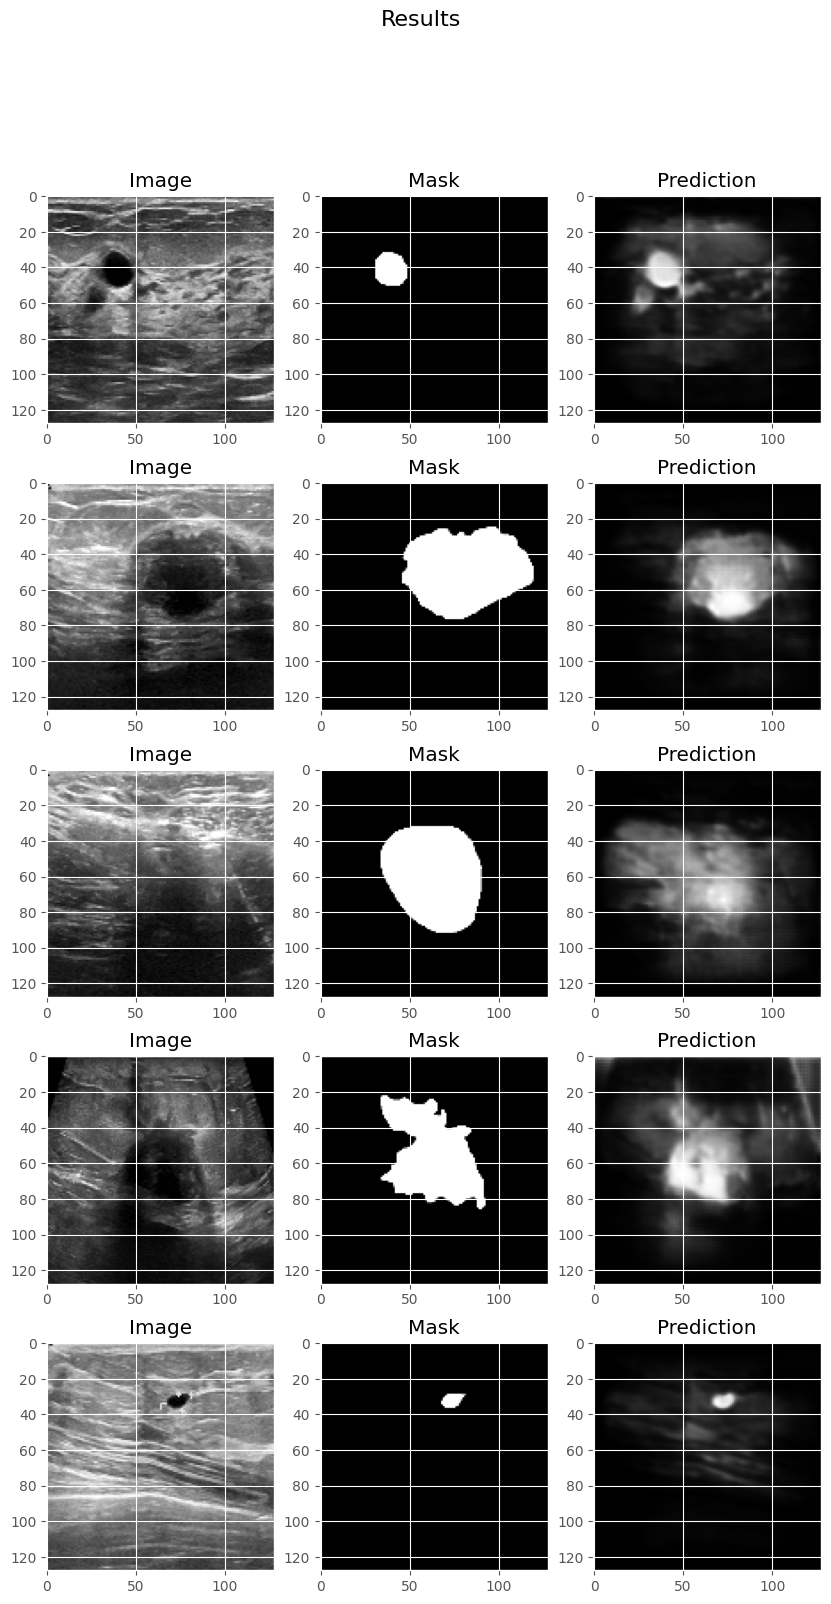

In [33]:
fig, ax = plt.subplots(5,3, figsize=(10,18))

j = np.random.randint(0, X_test.shape[0], 5)
for i in range(5):
    ax[i,0].imshow(X_test[j[i]], cmap='gray')
    ax[i,0].set_title('Image')
    ax[i,1].imshow(y_test[j[i]], cmap='gray')
    ax[i,1].set_title('Mask')
    ax[i,2].imshow(model.predict(np.expand_dims(X_test[j[i]],0),verbose=0)[0], cmap='gray')
    ax[i,2].set_title('Prediction')
fig.suptitle('Results', fontsize=16)
plt.show()

In [34]:
print(f'\033[93m')
y_pred=model.predict(X_test,verbose=0)
y_pred_thresholded = y_pred > 0.5

# mean Intersection-Over-Union metric
IOU_keras = MeanIoU(num_classes=2)
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

prec_score = Precision()
prec_score.update_state(y_pred_thresholded, y_test)
p = prec_score.result().numpy()
print('Precision Score = %.3f' % p)

recall_score = Recall()
recall_score.update_state(y_pred_thresholded, y_test)
r = recall_score.result().numpy()
print('Recall Score = %.3f' % r)

f1_score = 2*(p*r)/(p+r)
print('F1 Score = %.3f' % f1_score)


Mean IoU = 0.57177246
Precision Score = 0.234
Recall Score = 0.750
F1 Score = 0.357


<h2> VGG</h2>



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations, optimizers, losses, metrics, initializers
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV3Small, MobileNet, InceptionV3
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input, decode_predictions

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

Gloabal Variables

In [3]:
dir_path = '/content/drive/MyDrive/Dataset_BUSI_with_GT/'
IMAGE_SHAPE = (224, 224)

**Build Functions**

Create methods to make the code more organized

In [4]:
# create prepare_image method
# used to preprocess the image for efficientNet model
def prepare_image(file):
    img = image.load_img(file, target_size=IMAGE_SHAPE)
    img_array = image.img_to_array(img)
    return tf.keras.applications.efficientnet.preprocess_input (img_array)

### Read the files from each dirctory
Read all file from the three directories 'benign', 'malignant' and 'normal'

In [5]:
directories = os.listdir(dir_path) # read the folders

files = [] # save all images for each folder
labels = [] # set for each image the name of it

# read files for each directory
for folder in directories:

    fileList = glob.glob(dir_path + '/'+ folder + '/*')
    labels.extend([folder for l in fileList])
    files.extend(fileList)

len(files), len(labels)

(1578, 1578)

Remove any mask image from files

In [6]:
# create two lists to hold only non-mask images and label for each one
selected_files = []
selected_labels = []

for file, label in zip(files, labels):
    if 'mask' not in file:
        selected_files.append(file)
        selected_labels.append(label)


len(selected_files), len(selected_labels)

(780, 780)

Prepare the images
Prepare the images to be suitable as input for efficientnet model

In [7]:
# the dictionary holds list of images and for each one has its target/label
images = {
    'image': [],
    'target': []
}

print('Preparing the image...')

for i, (file, label) in enumerate(zip(selected_files, selected_labels)):
    images['image'].append(prepare_image(file))
    images['target'].append(label)

print('Finished.')

Preparing the image...
Finished.


Prepare the target for splitting

In [8]:
# convert lists to arrays
images['image'] = np.array(images['image'])
images['target'] = np.array(images['target'])

# encode the target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

images['target'] = le.fit_transform(images['target'])

classes = le.classes_ # get the classes for each target
print(f'the target classes are: {classes}')

the target classes are: ['benign' 'malignant' 'normal']


Split the data to train and test

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images['image'], images['target'], test_size=.10)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((702, 224, 224, 3), (78, 224, 224, 3), (702,), (78,))

VGG Model

In [10]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(*IMAGE_SHAPE, 3),
    classes=3)

# Freeze the base_model
base_model.trainable = False

# append my own layers on the top of the model for Transfer Learning
x = base_model.output

# 1st conv block
x = layers.Conv2D(256, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D(keepdims = True)(x)

# 2nd conv block
x = layers.Conv2D(128, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D(keepdims = True)(x)

# 1st FC layer
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# 2nd FC layer
x = layers.Dense(32, activation = 'relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(.2)(x)

x = layers.Dense(3, 'softmax')(x)

incept_model = keras.models.Model(inputs = base_model.input, outputs = x)

# compile the model
incept_model.compile(optimizer=optimizers.RMSprop(.001), loss = losses.sparse_categorical_crossentropy, metrics= [metrics.SparseCategoricalAccuracy()])

# incept_model.summary()

58889256/58889256 [==============================] - 0s 0us/step


### Train the model

In [11]:
earlyStop = keras.callbacks.EarlyStopping(patience=60)
model = keras.callbacks.ModelCheckpoint(filepath='model.h5', save_best_only=True)

with tf.device('/gpu:0'):
    history = incept_model.fit(x_train, y_train, batch_size=40, epochs=7, validation_data=(x_test, y_test), callbacks=[earlyStop, model])

Epoch 1/7
18/18 [==============================] - 36s 990ms/step - loss: 1.0616 - sparse_categorical_accuracy: 0.4843 - val_loss: 1.0436 - val_sparse_categorical_accuracy: 0.5000
Epoch 2/7


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 4s 196ms/step - loss: 0.6660 - sparse_categorical_accuracy: 0.7379 - val_loss: 1.0142 - val_sparse_categorical_accuracy: 0.5256
Epoch 3/7
18/18 [==============================] - 4s 219ms/step - loss: 0.5100 - sparse_categorical_accuracy: 0.8148 - val_loss: 0.9579 - val_sparse_categorical_accuracy: 0.6410
Epoch 4/7
18/18 [==============================] - 4s 216ms/step - loss: 0.3813 - sparse_categorical_accuracy: 0.8818 - val_loss: 0.9217 - val_sparse_categorical_accuracy: 0.6282
Epoch 5/7
18/18 [==============================] - 4s 218ms/step - loss: 0.3043 - sparse_categorical_accuracy: 0.9160 - val_loss: 0.9165 - val_sparse_categorical_accuracy: 0.6282
Epoch 6/7
18/18 [==============================] - 4s 215ms/step - loss: 0.2390 - sparse_categorical_accuracy: 0.9387 - val_loss: 0.8698 - val_sparse_categorical_accuracy: 0.6923
Epoch 7/7
18/18 [==============================] - 4s 223ms/step - loss: 0.2416 - sparse_categorical_accuracy: 0.93

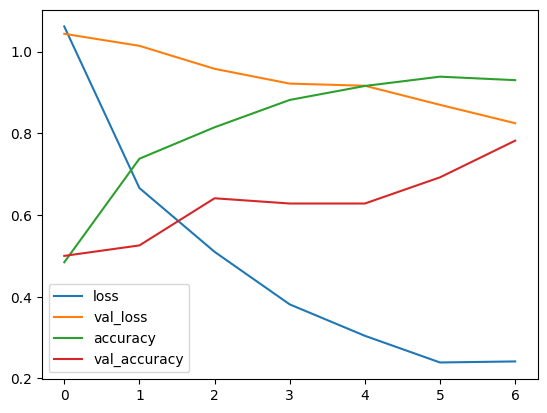

In [12]:
hist = history.history

plt.plot(hist['loss'], label=  'loss')
plt.plot(hist['val_loss'], label = 'val_loss')
plt.plot(hist['sparse_categorical_accuracy'], label='accuracy')
plt.plot(hist['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.legend()

In [14]:
incept_model.evaluate(x=x_test, y = y_test, batch_size=32, verbose=1)

3/3 [==============================] - 7s 1s/step - loss: 0.8248 - sparse_categorical_accuracy: 0.7821


[0.8248159885406494, 0.7820512652397156]

<h3>Evaluate the model</h3>

In [13]:
# open train the last 100 layers
for layer in incept_model.layers[720:]:
    layer.trainable = True

# compile the model with new optimizer and lr=.0001
incept_model.compile(optimizer=optimizers.RMSprop(.0001), loss = losses.sparse_categorical_crossentropy, metrics=[metrics.SparseCategoricalAccuracy()])

# incept_model.summary()

Train the model again

In [15]:
earlyStop = keras.callbacks.EarlyStopping(patience=60)
best_model = keras.callbacks.ModelCheckpoint(filepath='model.h5', save_best_only=True)

# load the best weights
# incept_model.set_weights(best_weights)

with tf.device('/gpu:0'):
    history = incept_model.fit(x_train, y_train, batch_size=32, epochs=7, validation_data=(x_test, y_test), callbacks=[earlyStop, best_model])

Epoch 1/7
22/22 [==============================] - 10s 367ms/step - loss: 0.1792 - sparse_categorical_accuracy: 0.9544 - val_loss: 0.7398 - val_sparse_categorical_accuracy: 0.8077
Epoch 2/7
22/22 [==============================] - 4s 162ms/step - loss: 0.1308 - sparse_categorical_accuracy: 0.9786 - val_loss: 0.6724 - val_sparse_categorical_accuracy: 0.8077
Epoch 3/7
22/22 [==============================] - 4s 171ms/step - loss: 0.1158 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.6103 - val_sparse_categorical_accuracy: 0.8590
Epoch 4/7
22/22 [==============================] - 4s 171ms/step - loss: 0.1069 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.5385 - val_sparse_categorical_accuracy: 0.8974
Epoch 5/7
22/22 [==============================] - 4s 175ms/step - loss: 0.1039 - sparse_categorical_accuracy: 0.9872 - val_loss: 0.4854 - val_sparse_categorical_accuracy: 0.8846
Epoch 6/7
22/22 [==============================] - 4s 165ms/step - loss: 0.0856 - sparse_categorical_acc

### Evaluate the model

In [17]:
incept_model.evaluate(x=x_test, y = y_test, batch_size=32, verbose=1)

3/3 [==============================] - 0s 114ms/step - loss: 0.3890 - sparse_categorical_accuracy: 0.8974


[0.3889687955379486, 0.8974359035491943]

Predict the model

In [16]:
# used to predict the model and visualize the orignal image with title of true and pred values
def predict_image(img_path, label):
    img1 = prepare_image(img_path) # preprocess the image
    res = incept_model.predict(np.expand_dims(img1, axis = 0)) # predict the image
    pred = classes[np.argmax(res)]

    # Visualize the image
    img = image.load_img(img_path)
    plt.imshow(np.array(img))
    plt.title(f'True: {label}\nPredicted: {pred}')

1/1 [==============================] - 1s 783ms/step


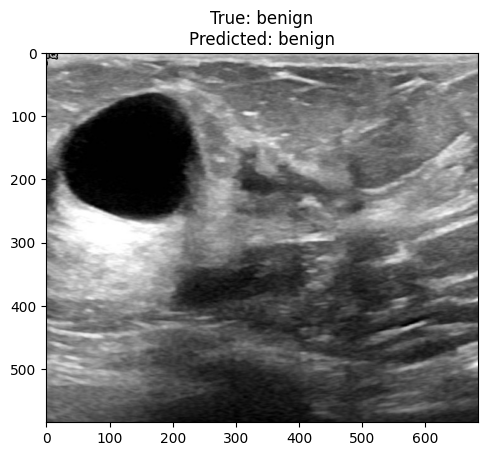

In [18]:
predict_image(dir_path + 'benign/benign (10).png', 'benign')

1/1 [==============================] - 0s 19ms/step


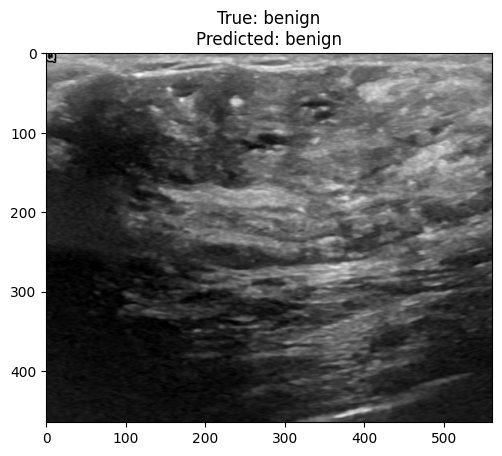

In [19]:
predict_image(dir_path + 'benign/benign (85).png', 'benign')

1/1 [==============================] - 0s 25ms/step


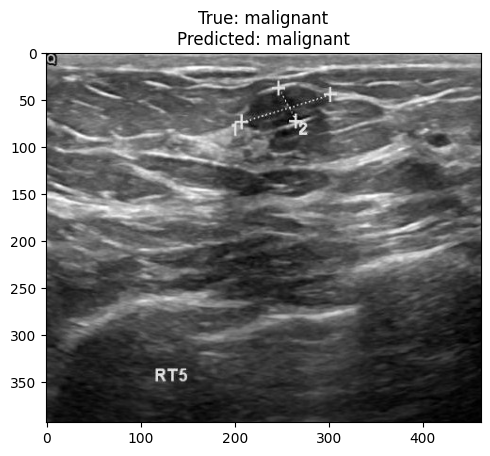

In [20]:
predict_image(dir_path + 'malignant/malignant (10).png', 'malignant')

In [21]:
incept_model.evaluate(np.array(x_test),np.array(y_test))

3/3 [==============================] - 0s 98ms/step - loss: 0.3890 - sparse_categorical_accuracy: 0.8974


[0.3889687955379486, 0.8974359035491943]

In [22]:
predicted = []
for item in incept_model.predict(x_test):
    predicted.append(np.argmax(item))

3/3 [==============================] - 0s 119ms/step


In [23]:
x_test.shape

(78, 224, 224, 3)

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf = confusion_matrix(y_test,predicted)
conf

array([[34,  2,  3],
       [ 3, 23,  0],
       [ 0,  0, 13]])

Text(0.5, 155.72222222222217, 'Predicted')

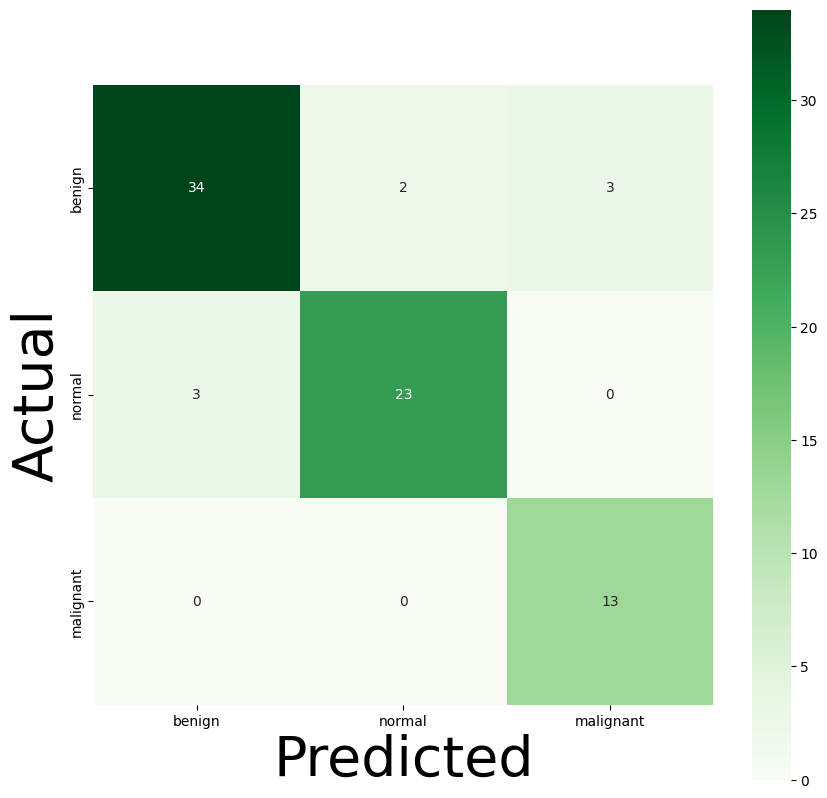

In [25]:
#Heatmap
info = [
    'benign'   ,  # 0
    'normal'   ,  # 1
    'malignant',  # 2
]
plt.figure(figsize = (10,10))
ax = sns.heatmap(conf, cmap=plt.cm.Greens, annot=True, square=True, xticklabels = info, yticklabels = info)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

<Axes: >

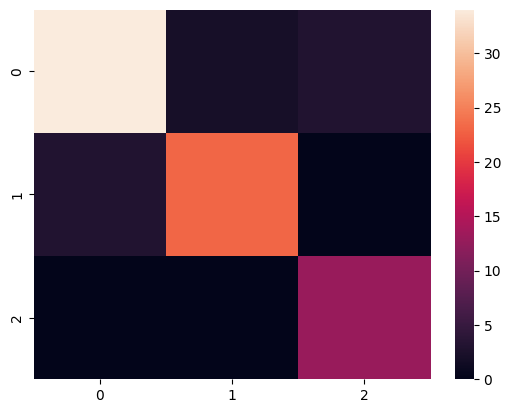

In [26]:
import seaborn as sns
sns.heatmap(conf)

<h3>Res-net

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os, glob, re, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers, activations, optimizers, losses, metrics, initializers
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions

In [ ]:
EPOCHS = 60

**Data Loader**

In [ ]:
# The code is defining a frame object called `frameObjTrain` which has two empty lists, `img` and `mask`,
# to store image and mask data respectively.
## defining a frame for image and mask storage
framObjTrain = {'img' : [],
           'mask' : []
          }

## defining data Loader function
def LoadData( frameObj = None, imgPath = None, maskPath = None, shape = 256):
    """
     Loads data from images and masks. This function is used to load image and mask data from images and masks.

     @param frameObj - Dictionary to store data in. If None is passed a new dictionary will be created
     @param imgPath - Path to the images.
     @param maskPath - Path to the masks. It is assumed that the images are in png format
     @param shape - Shape of the image.

     @return Dictionary with loaded data. If None is passed a new dictionary will be created
    """
    imgNames = os.listdir(imgPath)

    names = []
    maskNames = []
    unames = [imgNames[i].split(')')[0] for i in range(len(imgNames))]
    unames = list(set(unames))

    # Add the names and mask names to the names and mask names.
    for uname in unames:
        names.append(f'{uname}).png')
        maskNames.append(f'{uname})_mask.png')

    imgAddr = f'{imgPath}/'
    maskAddr = f'{maskPath}/'

    # Draw all images and masks in the frameObj.
    for i in range (len(names)):
        img = plt.imread(imgAddr + names[i])
        mask = plt.imread(maskAddr + maskNames[i])

        img = cv2.resize(img, (shape, shape))
        mask = cv2.resize(mask, (shape, shape))

        frameObj['img'].append(img)
        frameObj['mask'].append(mask)

    return frameObj

In [ ]:
# The code is loading benign and malignant samples of breast ultrasound images and storing them in the
# `framObjTrain` object. The `LoadData` function is used to load the
# images and masks from the specified paths (`imgPath` and `maskPath`) and resize them to a shape of 256x256 pixels.
# The loaded samples are then added to the `framObjTrain` object.

framObjTrain = LoadData( framObjTrain, imgPath = '/content/drive/MyDrive/Dataset_BUSI_with_GT/benign'
                        , maskPath = '/content/drive/MyDrive/Dataset_BUSI_with_GT/benign'
                        , shape = 256)

# loading malignant samples

framObjTrain = LoadData( framObjTrain, imgPath = '/content/drive/MyDrive/Dataset_BUSI_with_GT/malignant'
                        , maskPath = '/content/drive/MyDrive/Dataset_BUSI_with_GT/malignant'
                        , shape = 256)

In [ ]:
## displaying data loaded by our function
plt.figure(figsize = (10, 7))
plt.subplot(1,2,1)
plt.imshow(framObjTrain['img'][1])
plt.title('Ultra Sound Image')
plt.subplot(1,2,2)
plt.imshow(framObjTrain['mask'][1])
plt.title('Mask for Cancer')
plt.show()

**Model Defination**

In [ ]:
def Conv2dBlock(inputTensor, numFilters, kernelSize = 3, doBatchNorm = True):
    """
     Creates a conv block. It is assumed that the input tensor has been preprocessed by the block before.

     @param inputTensor - The input tensor to the block. Must be preprocessed by the block
     @param numFilters - The number of filters in the convolution block
     @param kernelSize - The
     @param doBatchNorm
    """
    #first Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (inputTensor)

    # Batch normalization. If doBatchNorm is true batch normalization is performed.
    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)

    x =tf.keras.layers.Activation('relu')(x)

    #Second Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (x)
    # Batch normalization. If doBatchNorm is true batch normalization is performed.
    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Activation('relu')(x)

    return x


def GiveMeUnet(inputImage, numFilters = 16, droupouts = 0.1, doBatchNorm = True):

    # defining encoder Path
    c1 = Conv2dBlock(inputImage, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)
    p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)
    p1 = tf.keras.layers.Dropout(droupouts)(p1)

    c2 = Conv2dBlock(p1, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)
    p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)
    p2 = tf.keras.layers.Dropout(droupouts)(p2)

    c3 = Conv2dBlock(p2, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)
    p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)
    p3 = tf.keras.layers.Dropout(droupouts)(p3)

    c4 = Conv2dBlock(p3, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)
    p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)
    p4 = tf.keras.layers.Dropout(droupouts)(p4)

    c5 = Conv2dBlock(p4, numFilters * 16, kernelSize = 3, doBatchNorm = doBatchNorm)

    # defining decoder path
    u6 = tf.keras.layers.Conv2DTranspose(numFilters*8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    u6 = tf.keras.layers.Dropout(droupouts)(u6)
    c6 = Conv2dBlock(u6, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)

    u7 = tf.keras.layers.Conv2DTranspose(numFilters*4, (3, 3), strides = (2, 2), padding = 'same')(c6)

    u7 = tf.keras.layers.concatenate([u7, c3])
    u7 = tf.keras.layers.Dropout(droupouts)(u7)
    c7 = Conv2dBlock(u7, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)

    u8 = tf.keras.layers.Conv2DTranspose(numFilters*2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    u8 = tf.keras.layers.Dropout(droupouts)(u8)
    c8 = Conv2dBlock(u8, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)

    u9 = tf.keras.layers.Conv2DTranspose(numFilters*1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1])
    u9 = tf.keras.layers.Dropout(droupouts)(u9)
    c9 = Conv2dBlock(u9, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)

    output = tf.keras.layers.Conv2D(1, (1, 1), activation = 'sigmoid')(c9)
    return tf.keras.Model(inputs = [inputImage], outputs = [output])

**Model Instantiation**

In [ ]:
## instanctiating model
inputs = tf.keras.layers.Input((256, 256, 3))
myTransformer = GiveMeUnet(inputs, droupouts= 0.07)
myTransformer.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )


**Training For 60 Epochs**

In [ ]:
%%time

# The code is fitting a transformer model to an image dataset.
# It measures the time taken for the fitting process using the `%%time` magic command.
# The `fit` function is called on the `myTransformer` object, passing in the image data (`framObjTrain['img']`)
# and the corresponding mask data (`framObjTrain['mask']`). The fitting process is performed for a
# specified number of epochs (`EPOCHS`) with no verbosity (`verbose = 0`).
# Additionally, the fitting process is parallelized using 4 workers and multiprocessing is enabled.
# The return value of the `fit` function is stored in the `retVal` variable.

retVal = myTransformer.fit(np.array(framObjTrain['img']), np.array(framObjTrain['mask']), epochs = EPOCHS, verbose = 0,
                          workers=4,
                          use_multiprocessing=True)

In [ ]:
plt.plot(retVal.history['loss'], label = 'training_loss')
plt.plot(retVal.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.grid(True)

###Testing

In [ ]:
def predict16(valMap, model, shape = 256):
    ## getting and proccessing val data
    img = valMap['img'][:16]
    mask = valMap['mask'][:16]

    imgProc = img[:16]
    imgProc = np.array(img)

    predictions = model.predict(imgProc)


    return predictions, imgProc, mask


def Plotter(img, predMask, groundTruth):
    plt.figure(figsize=(9,9))

    _extracted_from_Plotter_4(1, img, ' image')
    _extracted_from_Plotter_4(2, predMask, 'Predicted mask')
    _extracted_from_Plotter_4(3, groundTruth, 'Actual mask')


# TODO Rename this here and in `Plotter`
def _extracted_from_Plotter_4(arg0, arg1, arg2):
    plt.subplot(1, 3, arg0)
    plt.imshow(arg1)
    plt.title(arg2)

In [ ]:
sixteenPrediction, actuals, masks = predict16(framObjTrain, myTransformer)
Plotter(actuals[1], sixteenPrediction[1][:,:,0], masks[1])

In [ ]:
Plotter(actuals[2], sixteenPrediction[2][:,:,0], masks[2])

In [ ]:
Plotter(actuals[10], sixteenPrediction[10][:,:,0], masks[10])

**Saving Model**

In [ ]:
myTransformer.save('BreastCancerSegmentor.h5')

In [ ]:
dir_path = '/content/drive/MyDrive/Dataset_BUSI_with_GT/'
IMAGE_SHAPE = (224, 224)

**Build Functions**

In [ ]:
# create prepare_image method
# used to preprocess the image for efficientNet model
def prepare_image(file):
    img = image.load_img(file, target_size=IMAGE_SHAPE)
    img_array = image.img_to_array(img)
    return tf.keras.applications.efficientnet.preprocess_input (img_array)

In [ ]:
directories = os.listdir(dir_path) # read the folders

files = [] # save all images for each folder
labels = [] # set for each image the name of it

# read files for each directory
for folder in directories:

    fileList = glob.glob(f'{dir_path}/{folder}/*')
    labels.extend([folder for _ in fileList])
    files.extend(fileList)

len(files), len(labels)

**Remove any mask image from files**

In [ ]:
# create two lists to hold only non-mask images and label for each one
selected_files = []
selected_labels = []

for file, label in zip(files, labels):
    if 'mask' not in file:
        selected_files.append(file)
        selected_labels.append(label)


len(selected_files), len(selected_labels)

In [ ]:
# the dictionary holds list of images and for each one has its target/label
images = {
    'image': [],
    'target': []
}

print('Preparing the image...')

for file, label in zip(selected_files, selected_labels):
    images['image'].append(prepare_image(file))
    images['target'].append(label)

print('Finished.')

**Prepare the target for splitting**

In [ ]:
# convert lists to arrays
images['image'] = np.array(images['image'])
images['target'] = np.array(images['target'])

# encode the target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

images['target'] = le.fit_transform(images['target'])

classes = le.classes_ # get the classes for each target
print(f'the target classes are: {classes}')

**Split the data to train and test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images['image'], images['target'], test_size=.10)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

**Build the Model**

* create ResNet152V2 Model
* don't include_top layers to take only the features of the model
* freeze all layer weights of the model
* append my own layers for Transfer Learning
* compile my own model after Transfer Learning

In [ ]:
from tensorflow.keras.applications import resnet_v2
base_model = resnet_v2.ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(*IMAGE_SHAPE, 3),
    classes=3)

# Freeze the base_model
base_model.trainable = False

# append my own layers on the top of the model for Transfer Learning
x = base_model.output

# 1st conv block
x = layers.Conv2D(256, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D(keepdims = True)(x)

# 2nd conv block
x = layers.Conv2D(128, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D(keepdims = True)(x)

# 1st FC layer
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# 2nd FC layer
x = layers.Dense(32, activation = 'relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(.2)(x)

x = layers.Dense(3, 'softmax')(x)

incept_model = keras.models.Model(inputs = base_model.input, outputs = x)

# compile the model
incept_model.compile(optimizer=optimizers.RMSprop(.001), loss = losses.sparse_categorical_crossentropy, metrics= [metrics.SparseCategoricalAccuracy()])

# incept_model.summary()

###Train the model

In [ ]:
%%time

# Trains and returns incept_model. fit ( x_train y_train )
earlyStop = keras.callbacks.EarlyStopping(patience=60)
best_model = keras.callbacks.ModelCheckpoint(filepath='model.h5', save_best_only=True)

with tf.device('/gpu:0'):
    history = incept_model.fit(x_train, y_train, batch_size=32, epochs=EPOCHS, validation_data=(x_test, y_test), callbacks=[earlyStop, best_model])

In [ ]:
hist = history.history

plt.plot(hist['loss'], label=  'loss')
plt.plot(hist['val_loss'], label = 'val_loss')
plt.plot(hist['sparse_categorical_accuracy'], label='accuracy')
plt.plot(hist['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.legend()

**Evaluate the model**

In [ ]:
incept_model.evaluate(x=x_test, y = y_test, batch_size=32, verbose=1)

**Make the last 100 layers as trainable**

In [ ]:
# open train the last 100 layers
for layer in incept_model.layers[720:]:
    layer.trainable = True

# compile the model with new optimizer and lr=.0001
incept_model.compile(optimizer=optimizers.RMSprop(.0001), loss = losses.sparse_categorical_crossentropy, metrics=[metrics.SparseCategoricalAccuracy()])

# incept_model.summary()

**Train the model again**

In [ ]:
earlyStop = keras.callbacks.EarlyStopping(patience=60)
best_model = keras.callbacks.ModelCheckpoint(filepath='model.h5', save_best_only=True)

# load the best weights
# incept_model.set_weights(best_weights)

with tf.device('/gpu:0'):
    history = incept_model.fit(x_train, y_train, batch_size=32, epochs=EPOCHS, validation_data=(x_test, y_test), callbacks=[earlyStop, best_model])

###Evaluate the model

In [ ]:
incept_model.evaluate(x=x_test, y = y_test, batch_size=32, verbose=1)

###Predict the model

In [ ]:
# used to predict the model and visualize the orignal image with title of true and pred values
def predict_image(img_path, label):
    img1 = prepare_image(img_path) # preprocess the image
    res = incept_model.predict(np.expand_dims(img1, axis = 0)) # predict the image
    pred = classes[np.argmax(res)]

    # Visualize the image
    img = image.load_img(img_path)
    plt.imshow(np.array(img))
    plt.title(f'True: {label}\nPredicted: {pred}')

In [ ]:
predict_image(f'{dir_path}benign/benign (10).png', 'benign')

In [ ]:
predict_image(f'{dir_path}benign/benign (85).png', 'benign')

In [ ]:
predict_image(f'{dir_path}malignant/malignant (10).png', 'malignant')

# Model Evaluation

The U-NET model achieved the loss (0.2071)
The U-NET model attained the accuracy score (0.9128)

The CNN model achieved the loss (0.0756)
The CNN model attained the highest accuracy score (0.9745).

In [27]:

import pandas as pd

# Define the data for all three models
data = {
    "Model": ["CNN", "U-Net", "VGG16","Resnet"],
    "Accuracy": [0.97,0.91,0.85,0.84],
    "Loss": [0.07, 0.20, 0.42,0.25],
    # "Precision": [0.89, 0.84, 0.82,0.88],
    # "Recall": [0.86, 0.79, 0.78,0.70],
    # "F1 Score": [0.87, 0.81, 0.80,0.89]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

    Model  Accuracy  Loss
0     CNN      0.97  0.07
1   U-Net      0.91  0.20
2   VGG16      0.85  0.42
3  Resnet      0.84  0.25
